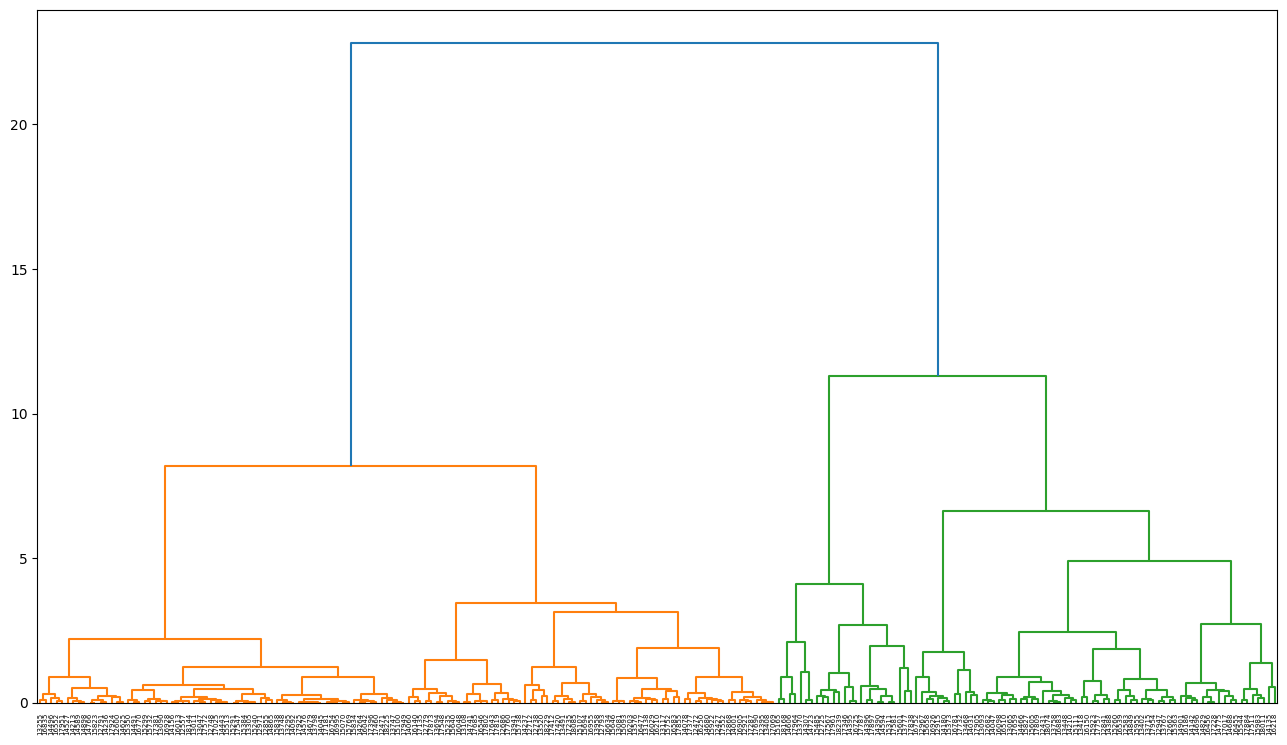

<Axes: xlabel='total_price', ylabel='total_buy_cnt'>

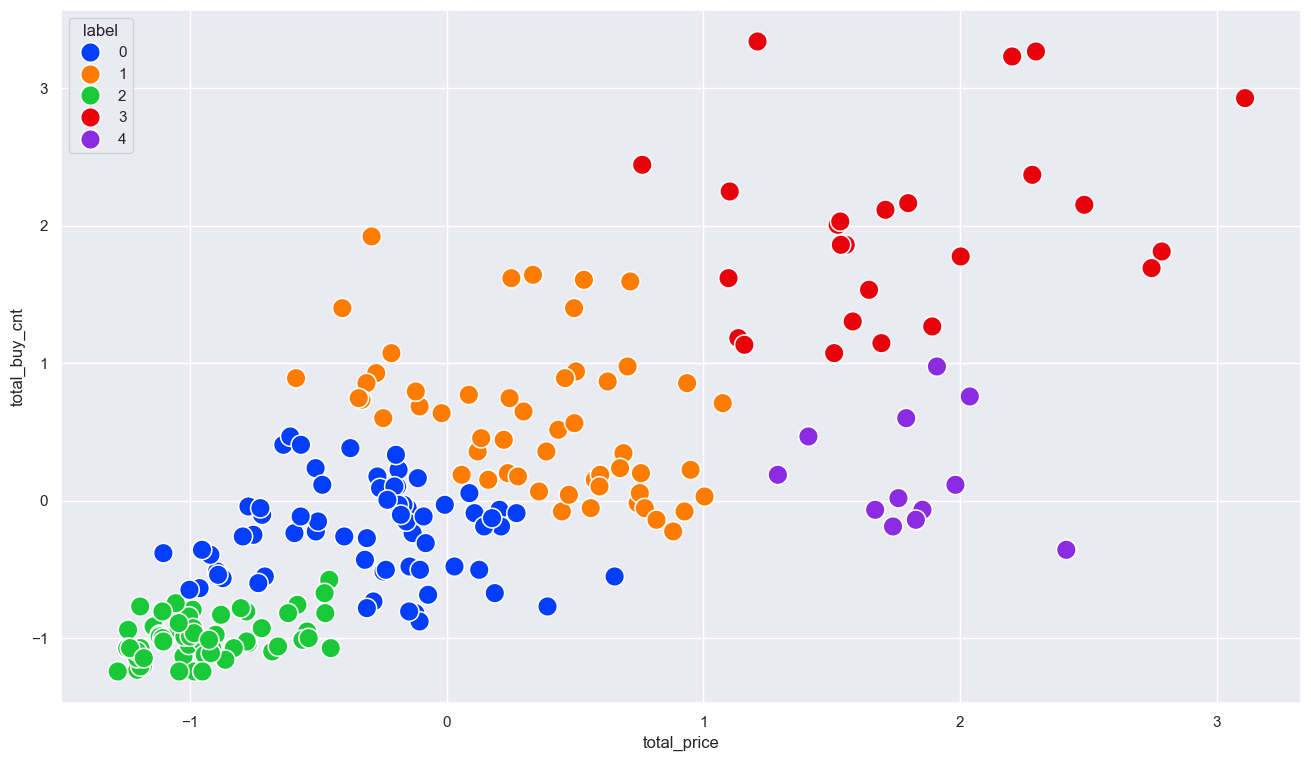

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import matplotlib.pyplot as plt

# IQR 이상치 제거를 위한 함수
def get_outlier_mask(df, weight=1.5):   
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    IQR = Q3 - Q1
    IQR_weight = IQR * weight

    range_min = Q1 - IQR_weight
    range_max = Q3 + IQR_weight

    outlier_per_column = (df < range_min) | (df > range_max)
    
    is_outlier = outlier_per_column.any(axis=1)

    return is_outlier


# 판다스 출력 결과를 소수점 2자리 까지로 제한
pd.options.display.float_format = '{:,.2f}'.format

# 데이터 불러오기
sales_df = pd.read_csv('data/sales_data.csv', index_col=['customer_id'])

# 이상치 제거
outlier_idx_cust_df = get_outlier_mask(sales_df, weight=1.5)
sales_df = sales_df[~outlier_idx_cust_df]

# 표준화
df_mean = sales_df.mean()
df_std = sales_df.std()
scaled_df = (sales_df - df_mean)/df_std 
scaled_df.columns = ['total_buy_cnt', 'total_price']

# 거리 : ward method
hierachical = linkage(scaled_df, 'ward')
labelList = scaled_df.index 

# 덴드로그램 사이즈와 스타일 조정
plt.figure(figsize=(16,9))
plt.style.use("default")

# 덴드로그램 생성
dendrogram(hierachical, labels=labelList)
plt.show()

# 클러스터 숫자 지정
cluster_num = 5

# 고객별 클러스터 라벨 구하기
prediction = cut_tree(hierachical, cluster_num)

# 기존 데이터프레임에 label 컬럼 생성
scaled_df['label'] = prediction

# 계층적 클러스터링 결과 확인
pd.DataFrame(scaled_df['label'].value_counts())

sns.set(style="darkgrid",
        rc = {'figure.figsize':(16,9)})

# 계층적 클러스터링 결과 시각화
sns.scatterplot(x=scaled_df['total_price'], y=scaled_df['total_buy_cnt'], data=scaled_df, hue=scaled_df['label'], s=200, palette='bright')

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import matplotlib.pyplot as plt

In [10]:
# 거리 : ward method
model = linkage(scaled_df, 'ward')

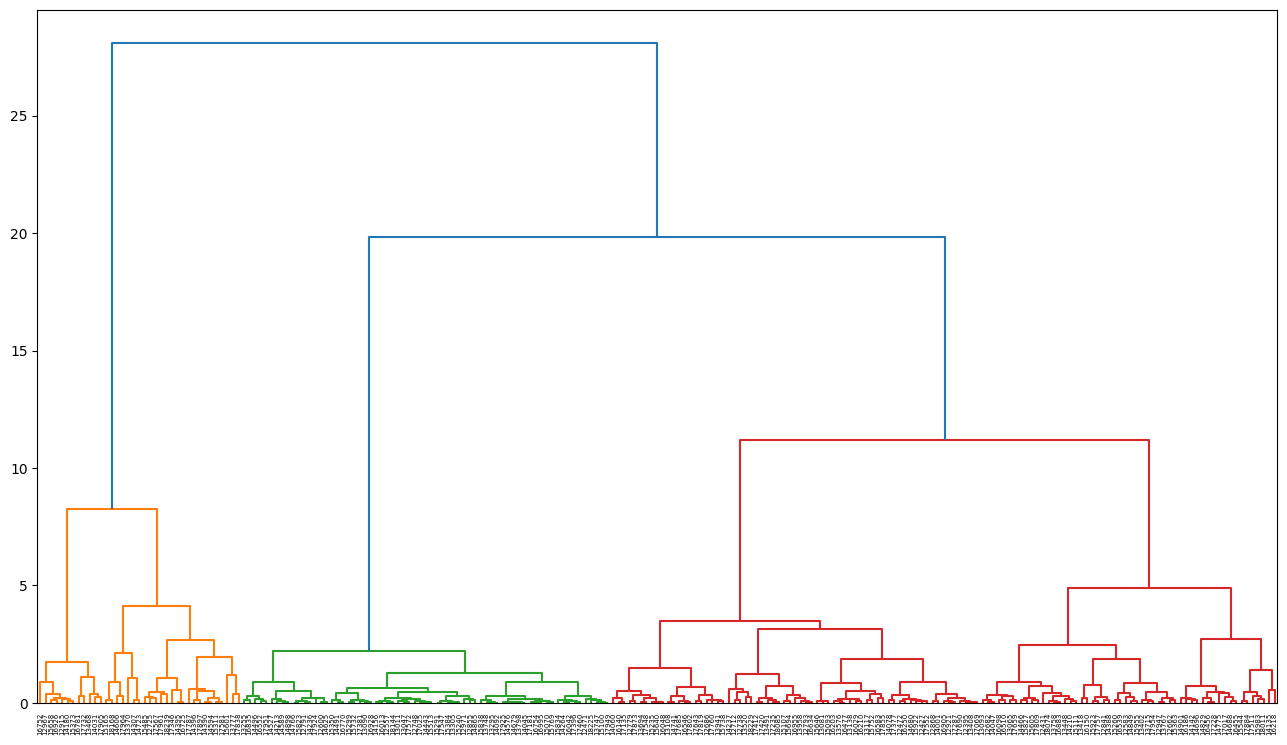

In [11]:
labelList = scaled_df.index 

# 덴드로그램 사이즈와 스타일 조정
plt.figure(figsize=(16,9))
plt.style.use("default")

dendrogram(model, labels=labelList)
plt.show()

In [12]:
cluster_num = 5

# 고객별 클러스터 라벨 구하기
scaled_df['label'] = cut_tree(model, cluster_num)

pd.DataFrame(scaled_df['label'].value_counts())

,count
label,
0,67
2,67
1,54
3,25
4,12


<Axes: xlabel='total_price', ylabel='total_buy_cnt'>

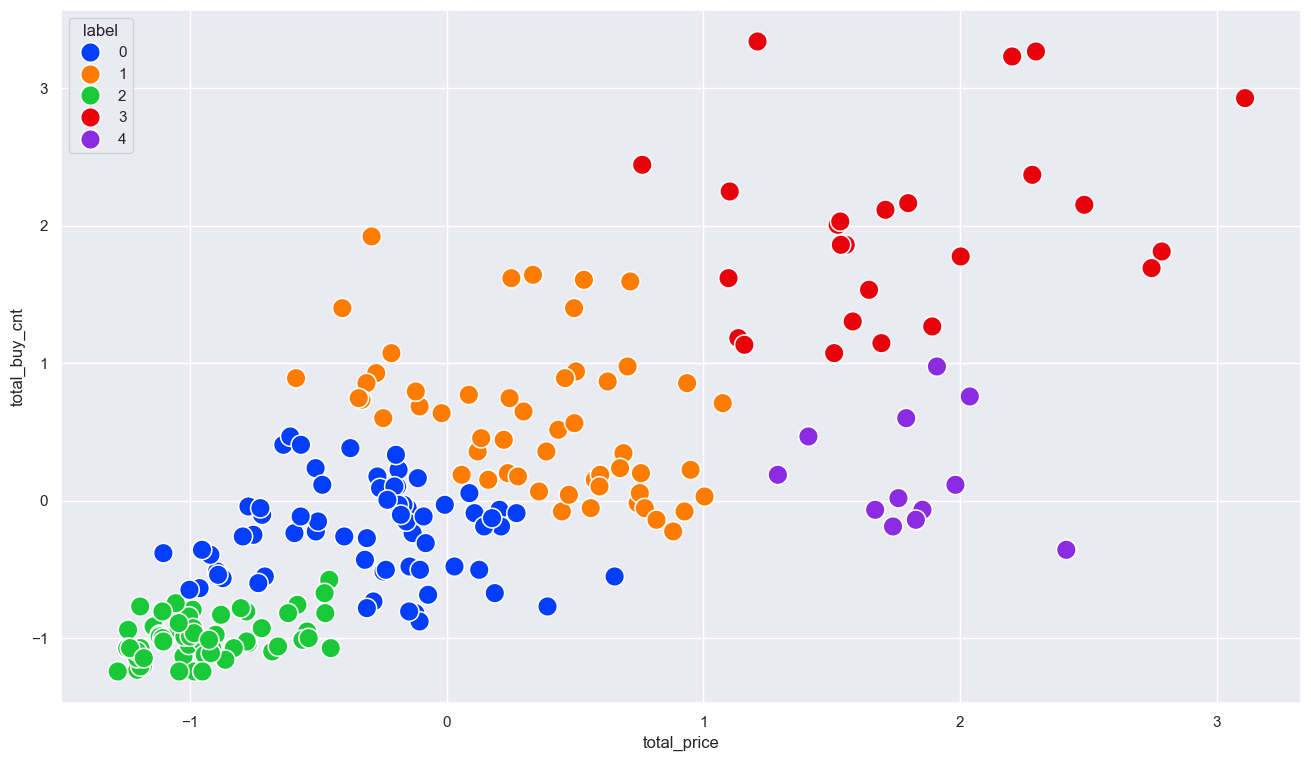

In [13]:
sns.set(style="darkgrid",
        rc = {'figure.figsize':(16,9)})

# 계층적 클러스터링
sns.scatterplot(x=scaled_df['total_price'], y=scaled_df['total_buy_cnt'], hue=scaled_df['label'], s=200, palette='bright')

In [14]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import matplotlib.pyplot as plt

scaled_df = pd.read_csv('data/scaled_data.csv', index_col=[0])

# 모델 학습
model = linkage(scaled_df, 'ward')

# 고객별 클러스터 라벨 구하기
cluster_num = 3

scaled_df['label_agg'] = cut_tree(model, cluster_num)

# 각 클러스터에 포함된 데이터 개수 확인
scaled_df['label_agg'].value_counts()

label_agg
0    134
1     66
2     25
Name: count, dtype: int64